In [2]:
# Imports

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from numpy.lib.function_base import corrcoef
import math

# Tratamiento Previo

## Lectura del CSV

In [3]:
pokemon_df = pd.read_csv("pokemon_data.csv")

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


## Quitar Megaevoluciones y calcular puntuación total

Limpiamos el dataframe quitando todos los pokemon que contengan en su nombre alguna de las cadenas de la blacklist

In [4]:
blacklist = ['Mega', 'Black', 'Primal', 'White', 'Hoopa', 'Forme', 'Size']

for i in blacklist:
  pokemon_df = pokemon_df.drop(pokemon_df[pokemon_df['Name'].str.contains(i)].index) # Quitamos pokemon con algun elemento de la blacklist en su nombre

pokemon_df['Total'] = pokemon_df.iloc[:,4:9].sum(axis=1) # Sumamos la puntuación de todos los atributos para calcular el tottal

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,273
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,345
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,445
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,244
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,412
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True,581
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True,581
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,550


## Separar legendarios y no legendarios


Se generan dos dataframes independientes que distinguen entre Pokemon legendarios y no legedarios

In [5]:
grouped = pokemon_df.groupby(pokemon_df.Legendary)

legendary_df  = grouped.get_group(True) # Legendary DataFrame
non_legendary_df  = grouped.get_group(False) # Non Legendary Dataframe

# 1. Estadistica Descriptiva

# Legendarios

## Descriptiva univariante

In [6]:
tab = pd.crosstab(index=legendary_df['Type 1'], columns='count') # Contamos cuantos legendarios hay de cada tipo

porcentajes = (tab/tab.sum())*100 # Calculamos el porcentaje diviiendo por el total multiplicando por 100

En el dataframe de porcentajes, se almacena el porcentaje de pokemon legendarios que hay segun su tipo. A continuación se muestra en un pychar:

### Ploteamos en grafico de sectores

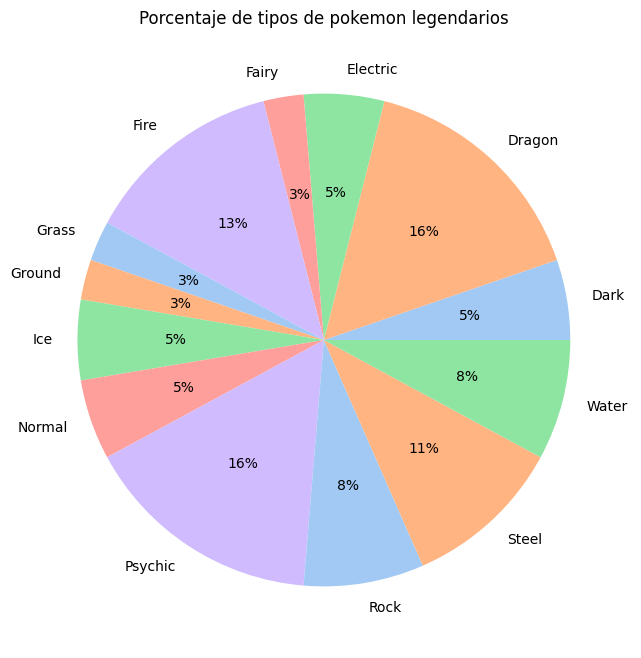

In [7]:
#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

En este diagrama de sectores, de una manera más visual se puede apreciar los pokemon de tipo dragon y tipo psiquico son los que más predominan. 

A continuación realizamos una descriptiva más exhaustiva del dataframe de pokemon legendarios para hacernos una idea de la distribución de las distintas variables cuantitativas.

In [8]:
legendary_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,442.815789,94.447368,106.868421,105.578947,112.447368,110.157895,93.921053,3.578947,529.500000
std,175.465844,16.388357,24.643590,25.549773,25.920562,26.915811,19.809064,1.481992,46.158803
min,144.000000,50.000000,50.000000,70.000000,50.000000,70.000000,50.000000,1.000000,465.000000
25%,377.250000,80.000000,90.000000,90.000000,91.250000,90.000000,90.000000,3.000000,490.000000
50%,480.500000,91.000000,100.000000,100.000000,112.500000,100.000000,97.000000,4.000000,530.000000
75%,602.000000,103.750000,123.750000,120.000000,130.000000,123.750000,108.000000,5.000000,580.000000
max,721.000000,126.000000,160.000000,200.000000,154.000000,200.000000,130.000000,6.000000,600.000000


También podemos mostrar la descriptiva anterior en un diagrama de cajas y bigotes, para poder comprender mejor la distribución de nuestros datos de manera gráfica

### Box-Whiskers

Con este diagrama podemos ver la distribución de nuetsros datos de puntuación total. a priori a juzgar por la posición de la mediana dentro de la caja podmeos decir que la puntuación total no sigue una distribución normal, ya que la media y la mediana no son parecidas (la linea de la medianano esta en medio de la caja)

Text(0, 0.5, 'Score')

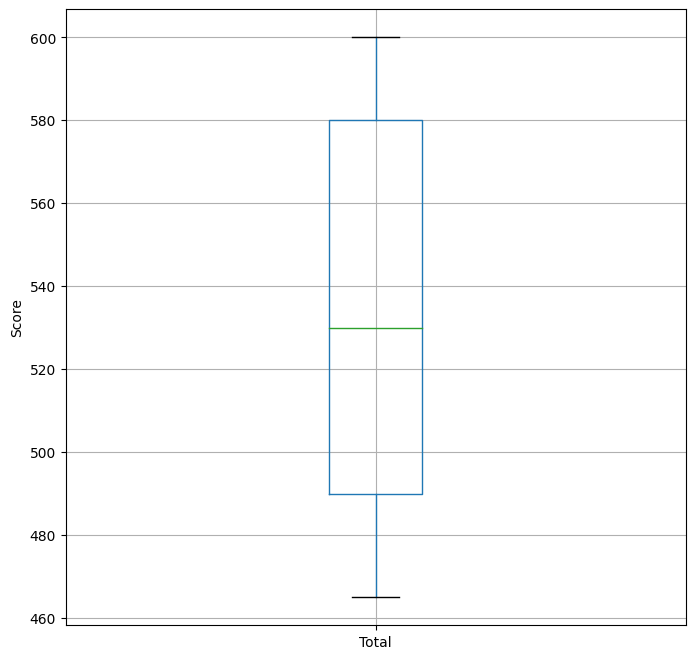

In [9]:
plt.figure(figsize=(8,8))

legendary_df.boxplot('Total') # Digrama de cajas y bigotes de la puntuación total

plt.ylabel("Score")

Ahora observamos con más detenimiento la distribución de los datos dentro de cada atributo. A priori, podrimaos decir que lso datos de ataque parecen seguir una distribución normal.

Text(0, 0.5, 'Score')

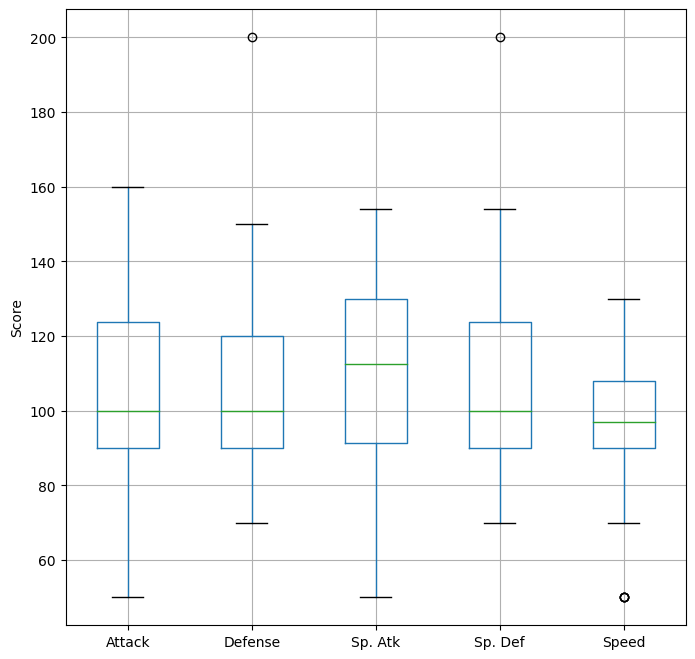

In [10]:
plt.figure(figsize=(8,8))
legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])
plt.ylabel("Score")

Vemos como de cada atributo por separado el que más parece seguir una distribución normal es el ataque especial. Esto lo podemos comporbar también fijandonos en que la media y la mediana de ataque especial tienen practicamente el mismo valor

## Descriptiva bivariante




En este punto, vamos a ver la correlación que existe entre los distintos ataques y defensas que tienen los pokemon. Estudiaremos la correlación que existe entre el ataque y el ataque especial y por otro lado la que existe entre la defensa y la defensa especial

### Correlación Ataque - Ataque Especial

array([[1.        , 0.26872507],
       [0.26872507, 1.        ]])

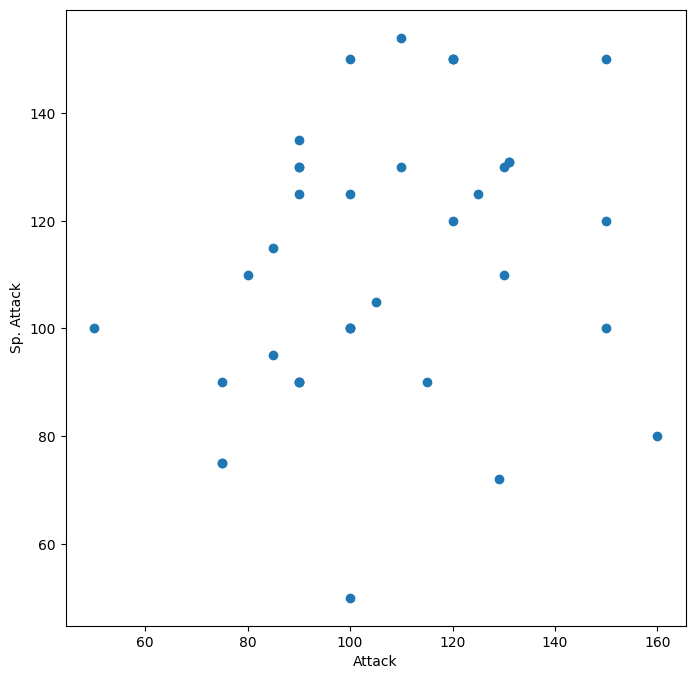

In [11]:
plt.figure(figsize=(8,8))

plt.scatter(legendary_df["Attack"],legendary_df["Sp. Atk"])
plt.xlabel("Attack")
plt.ylabel("Sp. Attack")

corrcoef(legendary_df["Attack"],legendary_df["Sp. Atk"]) # Calculo de la matriz de correlación

Si representamos los datos de ataque y ataque especial en un diagrama de dispersión y calculamos su coeficiente de correlación se aprecia que hay cierta correlación positiva entre ataque y ataque especial aunque no muy fuerte ya que el coeficiente nos da un valor de 0.27. Esto también se puede ver tambien en diagrama si nos fijamos en que los puntos no están muy agrupados.

### Correlación Defensa - Defensa Especial

array([[1.        , 0.18013723],
       [0.18013723, 1.        ]])

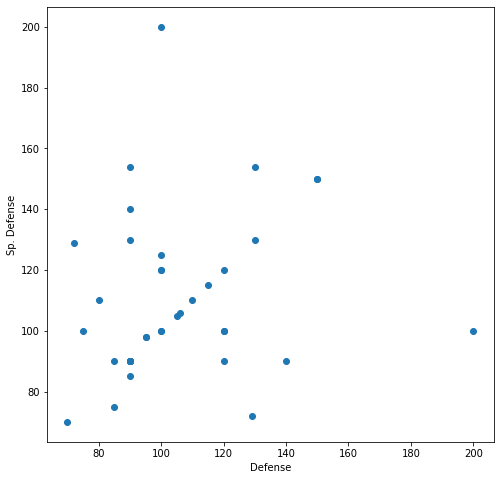

In [13]:
plt.figure(figsize=(8,8))

# Diagrama de dispersión
plt.scatter(legendary_df["Defense"],legendary_df["Sp. Def"])
plt.xlabel("Defense")
plt.ylabel("Sp. Defense")

corrcoef(legendary_df["Defense"],legendary_df["Sp. Def"]) # Calculo de la matriz de correlación

In [12]:
print(legendary_df[legendary_df["Sp. Def"] == 200])
print(legendary_df[legendary_df["Defense"] == 200])

       #    Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
415  378  Regice    Ice    NaN  80      50      100      100      200     50   

     Generation  Legendary  Total  
415           3       True    530  
       #      Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
414  377  Regirock   Rock    NaN  80     100      200       50      100   

     Speed  Generation  Legendary  Total  
414     50           3       True    530  


Por otro lado, al representar la defensa y la defensa especial en un diagrama de dispersión vemos como los datos parecen estar más agrupados y de la misma forma (correlación positiva) que en el caso anterior cuando comparabamos los ataques. 

Sin embargo, hay dos Pokemon que se salen de esta agrupación tal y como podemos ver en el gráfico. Estos son Regice y Regirock de la tercera generación.

Por estos dos Pokemon es por lo que el coeficiente de correlación nos da de 0.16. Si no considerasemos estos dos pokemon las dos variables esrarían más correladas

### Conclusión

Podemos sacar como conclusión de este análisis que tanto ataques como defensas guardan una correlación lineal positiva. En el caso de los ataques con más fuerza ya que en las defensas tenemos a dos Pokemon que tienen defensa y defensa especial muy desbalanceadas entre si 

# Top 5

Finalmente ordenamos por los pokenmon con mayor puntuación total para calcular el top 5 de Pokemnon legendarios presentes en los distintos juegos de la franquicia

In [13]:
top_legendaries = legendary_df.sort_values('Total', ascending=False).head(5)

top_legendaries

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
552,493,Arceus,Normal,NaN,120,120,120,120,120,120,4,True,600
540,483,Dialga,Steel,Dragon,100,120,120,150,100,90,4,True,590
270,250,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,590
707,644,Zekrom,Dragon,Electric,100,150,120,120,100,90,5,True,590
706,643,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True,590


Mostramos graficamente

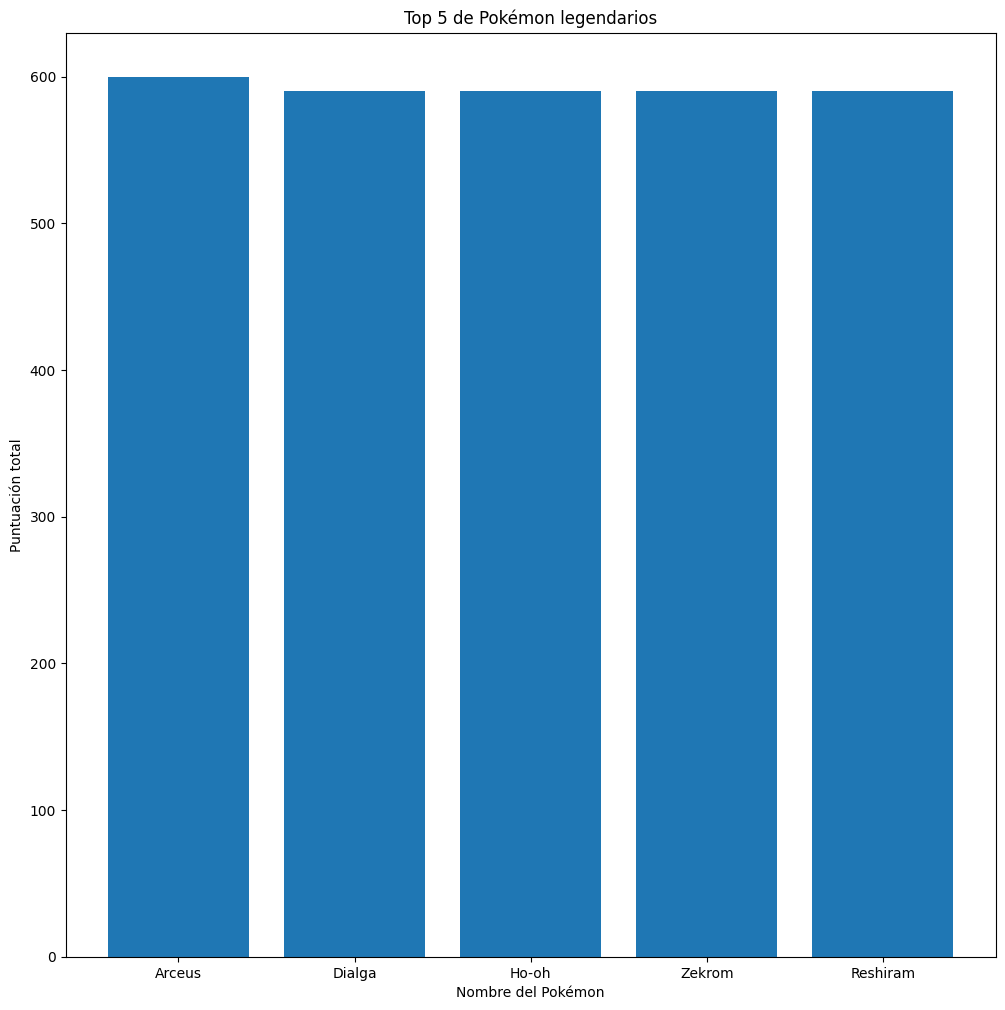

In [14]:
plt.figure(figsize=(12,12))

plt.bar(top_legendaries['Name'], top_legendaries['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon legendarios')
plt.show()

# No legendarios

Esta descriptiva de pokemon no legendarios es análoga a la realizada anteriormente con pokemon legendarios. Como ya se ha comentado todo el proceso descriptivo anteriormente. En esta sección se tratará solo las conclusiones obtenidas sobre la ponlación de no legendarios

## Descriptiva univariante

In [15]:
# Porcentaje de pokemon segun tipo
tab = pd.crosstab(index=non_legendary_df['Type 1'], columns='count')

porcentajes = (tab/tab.sum())*100

porcentajes

col_0,count
Type 1,
Bug,9.587021
Dark,3.834808
Dragon,2.507375
Electric,5.604720
Fairy,2.359882
Fighting,3.687316
Fire,6.342183
Flying,0.294985
Ghost,2.949853


### Diagrama de sectores

<Figure size 800x800 with 0 Axes>

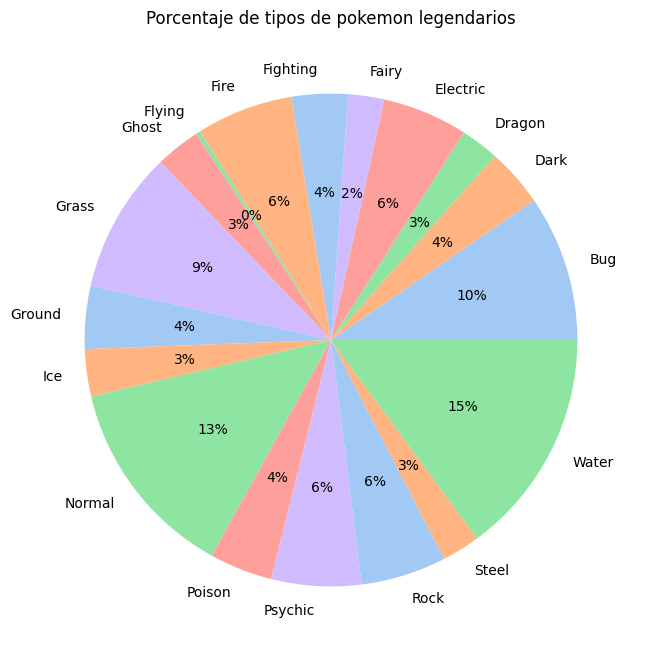

In [16]:
plt.figure(figsize=(8,8))

#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

# 

Los tipos de pokemon no legendarios más predeminantes son Agua y normal que componen el 28%, les siguen bicho y planta que componen el 19% de los datos del dataframe. Estos 4 tipos de pokemon componen el 47% de todos los pokemon

### Box and Whiskers

<AxesSubplot: >

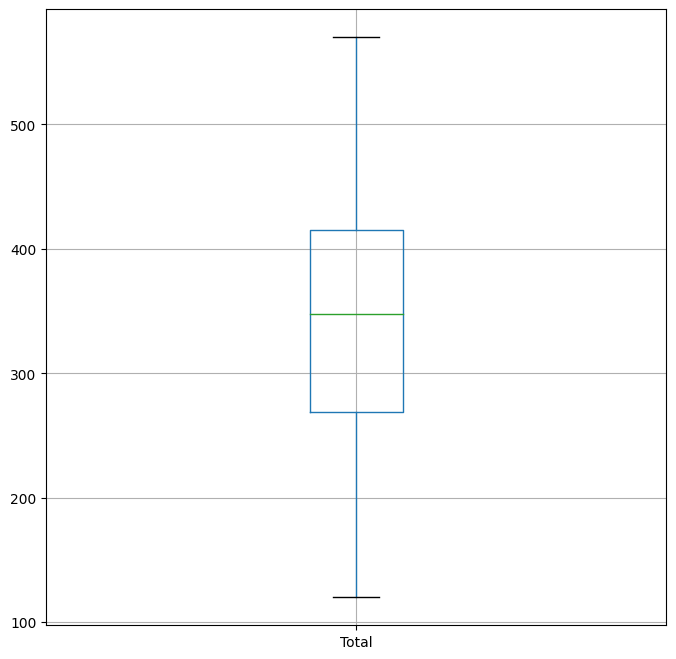

In [17]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot('Total')

<AxesSubplot: >

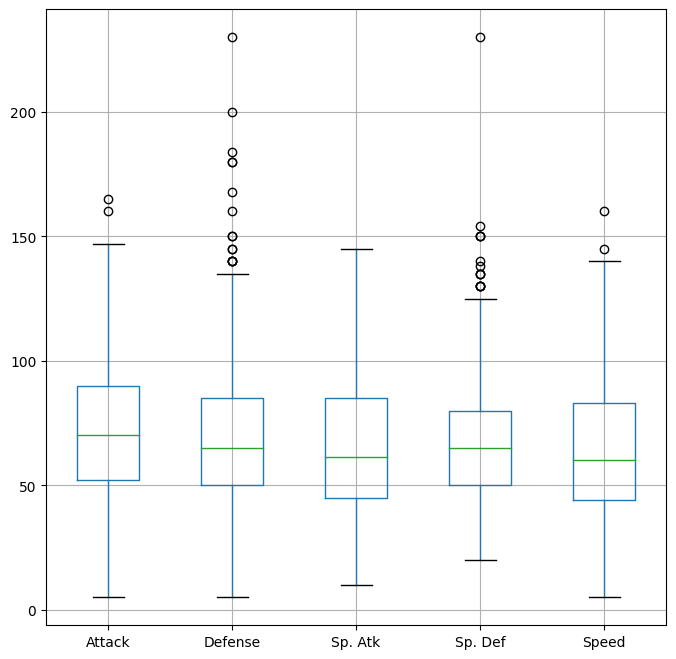

In [18]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])

La variable que a priori mejor se podría aproximar a una distribución normal sería el ataque.

## Descriptiva bivariante

### Correlación Ataque - Ataque Especial

array([[1.        , 0.22536116],
       [0.22536116, 1.        ]])

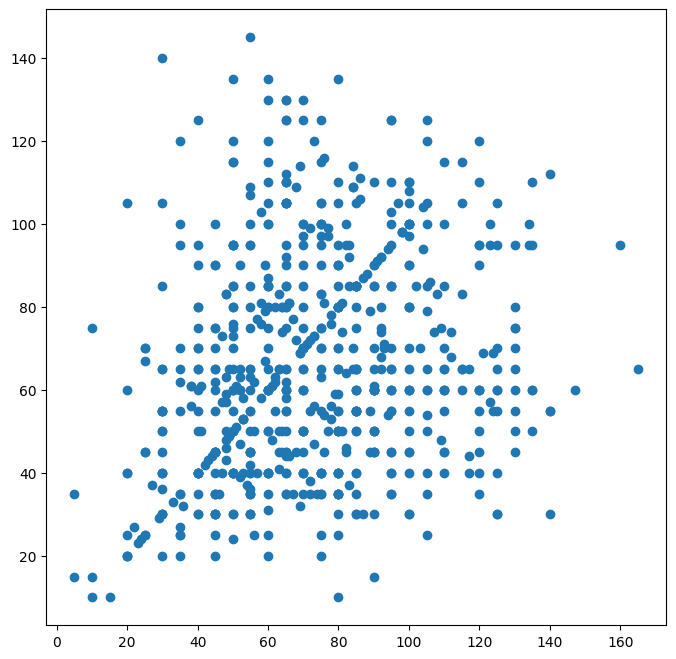

In [19]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])
corrcoef(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])

### Correlación Defensa - Defensa Especial

array([[1.        , 0.44408917],
       [0.44408917, 1.        ]])

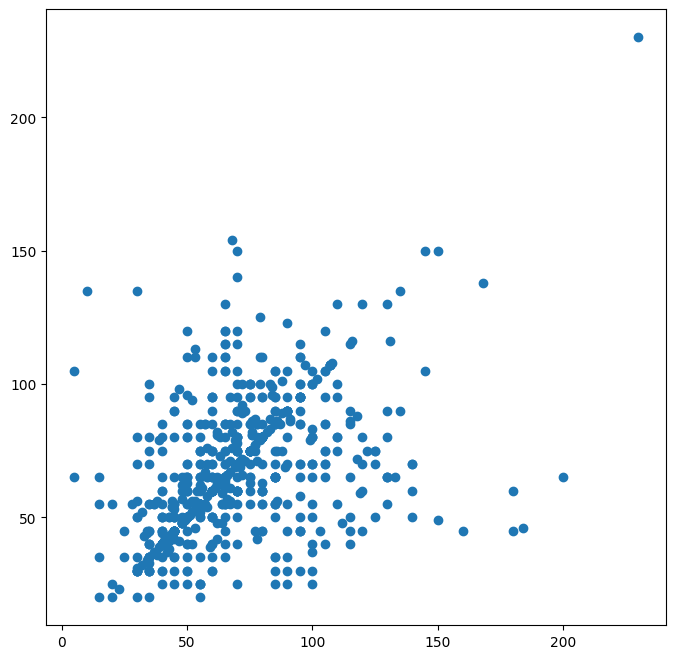

In [20]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])
corrcoef(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])

En el caso de pokemon no legendarios, los diagramas de dispersión nos dicen que existe una correlación lineal positiva entre ataques y defensas. En este caso mayor que en el de no legendarios si damos un vistazo a los coeficientes.

## Top 5

In [21]:
top_non_legendaries = non_legendary_df.sort_values('Total', ascending=False).head(5)

top_non_legendaries

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,3,False,570
267,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False,539
412,376,Metagross,Steel,Psychic,80,135,130,95,90,70,3,False,530
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False,520
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False,520


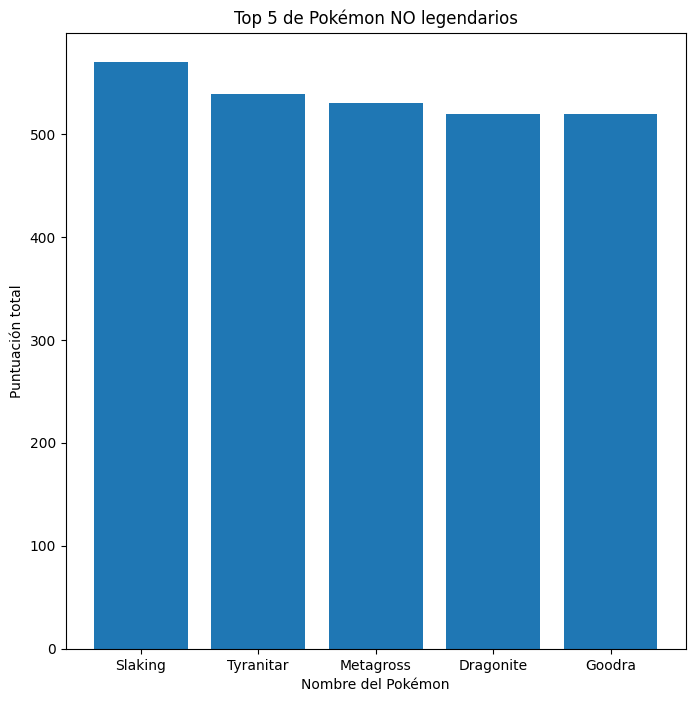

In [22]:
plt.figure(figsize=(8,8))

plt.bar(top_non_legendaries['Name'], top_non_legendaries['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon NO legendarios')
plt.show()

# Puntuación total de legendarios y no legendarios según el tipo

<AxesSubplot: xlabel='Type 1', ylabel='Total'>

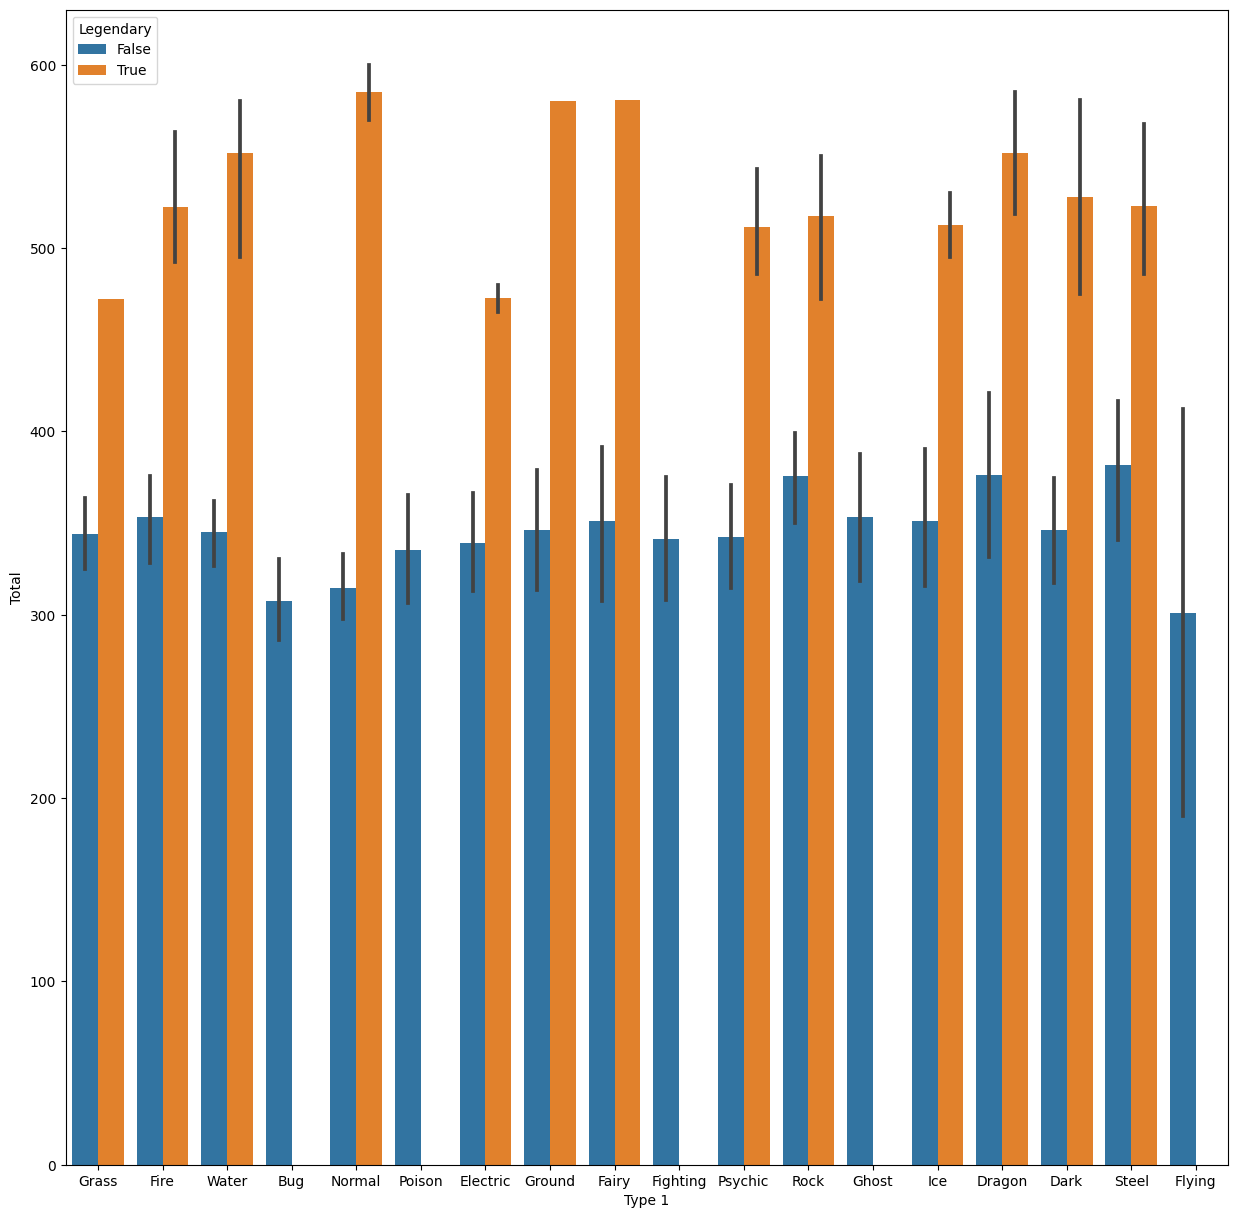

In [23]:
plt.figure(figsize=(15,15))

sns.barplot(data=pokemon_df, x="Type 1", y="Total", hue="Legendary")

En esta última parate queríamos hacer una descriptiva teniendo en cuenta una variable categórica como es el tipo de pokemon.

En el gráfico se muestra la comparación de puntuación total delegendarios y no legendarios distinguiendo por tipo.

A simple vista se demuestra que los Pokemon legendarios son mucho más fuertes que los Pokemon habituales

# 2. Analisis de normalidad de los datos de Pokemon

Formas de ver normalidad:
 - Histograma (con desity)
 - Box plot
 - Describe
 - QQ Plot
 - Asimetria/Kurtosis
 - Contraste de hipotesis

## Histograma

Mostramos la población completa de pokemon según su puntuación total

Text(0, 0.5, 'Nº Pokemon')

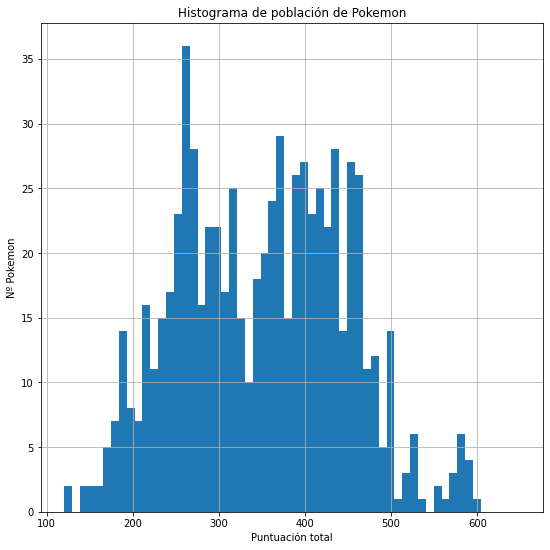

In [18]:
pokemon_df['Total'].hist(bins=58,
                range=(120,650),
                figsize=(9,9))
plt.title("Histograma de población de Pokemon")
plt.xlabel("Puntuación total")
plt.ylabel("Nº Pokemon")

Vemos que existe un grupo situado en una puntuación m entre 550 y 600 puntos que son los Pokemon Legendarios

Text(0, 0.5, 'Nº Pokemon')

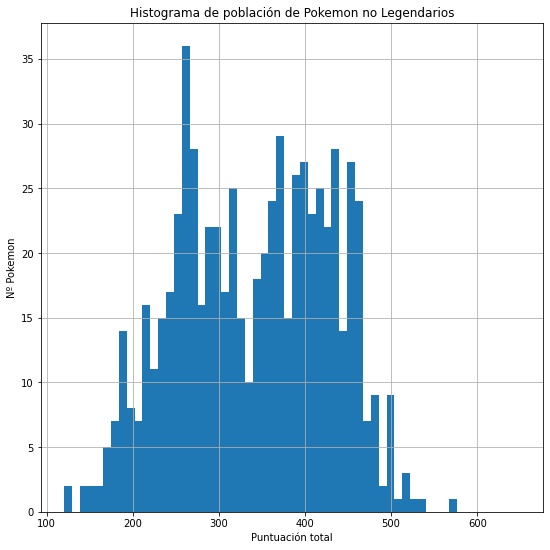

In [16]:
non_legendary_df['Total'].hist(bins=58,
                range=(120,650),
                figsize=(9,9))
plt.title("Histograma de población de Pokemon no Legendarios")
plt.xlabel("Puntuación total")
plt.ylabel("Nº Pokemon")

Text(0, 0.5, 'Nº Pokemon')

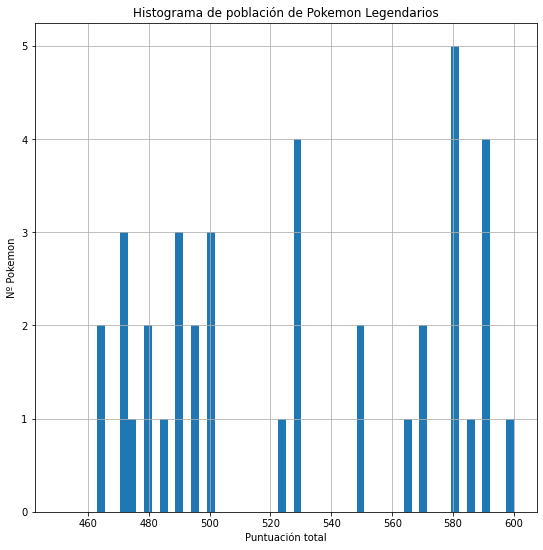

In [19]:
legendary_df['Total'].hist(bins=58,
                range=(450,600),
                figsize=(9,9))
plt.title("Histograma de población de Pokemon Legendarios")
plt.xlabel("Puntuación total")
plt.ylabel("Nº Pokemon")

Como hemos visto anteriormente, los pokemon legendarios están mucho más fuertes que los normales y desviarían los resultados que podríamos sacar en los próximos análisis. Es por ello que a partir de este punto se realizaran los análisis sobre la población de pokemon No Legendarios, que además están presentes en en mucha mayor proporción que los pokemon legendarios

## Distribución de probabilidad

72.570796460177

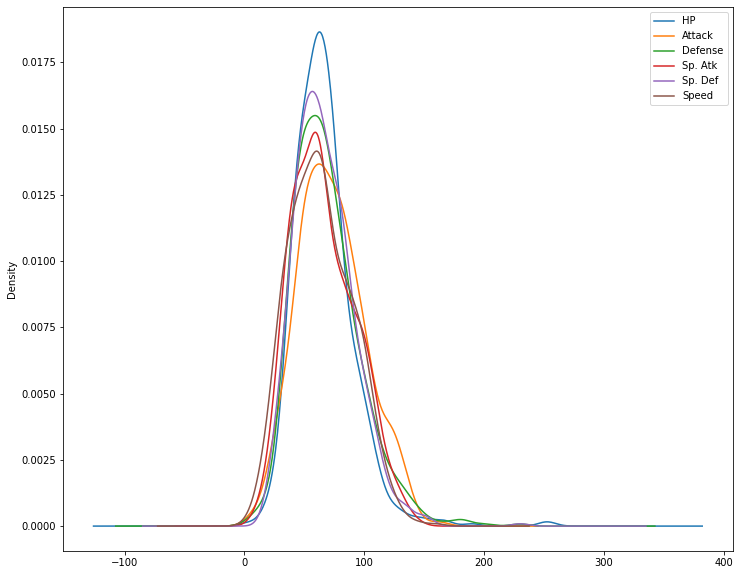

In [25]:
atributes = ["HP", "Attack","Defense","Sp. Atk","Sp. Def","Speed"] # Almacenamos los atributos en una lista

non_legendary_df[atributes].plot(kind = "density", figsize = (12,10)) # Distribución de probabilidad

non_legendary_df["Attack"].mean()

Si vemos las distribuciones de probabilidad de cada atributo de los pokemon por separado, a priori por las formas que presenta algunas podriamos aproximarlas a una distribución normal.

Veamos qué pasa al hacer la función de distribución de probabilidad, resultado de sumar la puntuación de los atributos de cada uno de los pokemon.

Text(0.5, 0, 'Puntuación total')

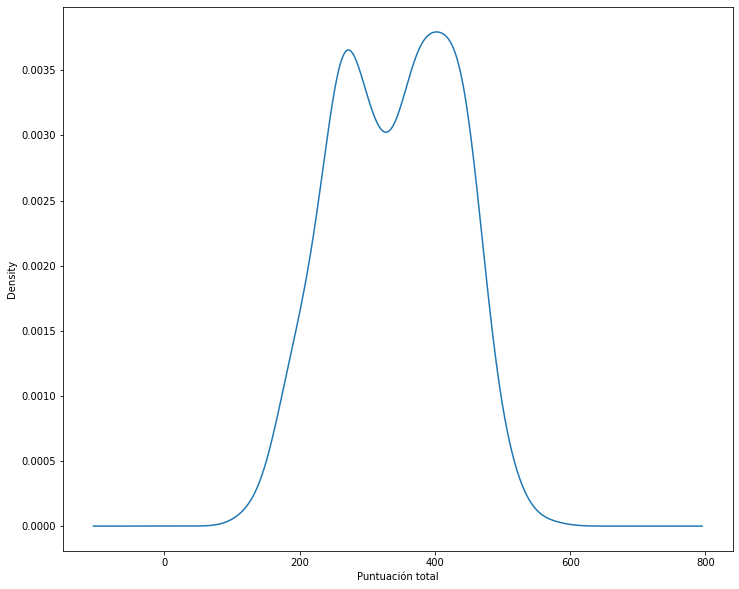

In [24]:
non_legendary_df['Total'].plot(kind = "density", figsize = (12,10)) # Distribución de probabilidad
plt.xlabel("Puntuación total")

A juzgar por la forma de la función de densidad de probabilidad del total podemos sacar en claro que hay dos grupos de pokemon. Los dos grandes grupos que podemos distinguir son:
- Los que tiene una puntuación total en torno a 200 (pokemon debiles).
- Los que tienen una puntuación total en torno a 400 (pokemon fuertes).

En conclusión, podemos decir que la distribución de puntuación tottal de todos los pokemon no sigue una distribución normal.

Como anteriormente hemos visto que algunos atributos parecían seguir una distribución normal, a continuación se estudiara esto más en detalle 


## Box plot

<AxesSubplot:>

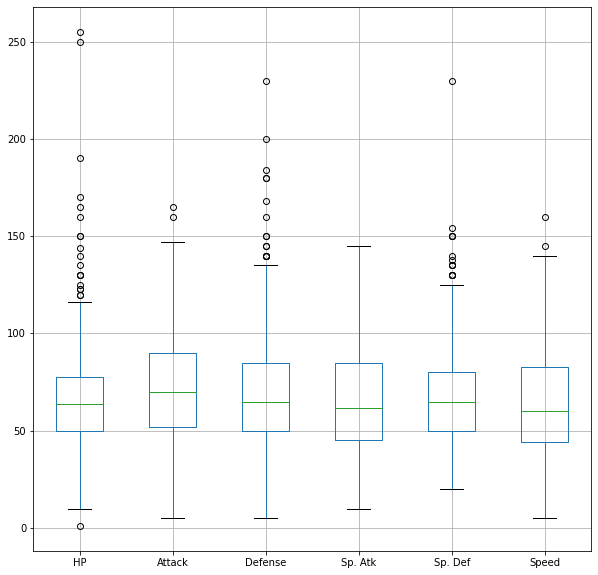

In [26]:
plt.figure(figsize=(10,10))
non_legendary_df.boxplot(column=atributes)

## Describe

In [27]:
non_legendary_df[atributes].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,66.492625,72.570796,68.859882,65.936578,66.904130,63.674041
std,25.308305,27.881796,28.229480,26.404765,24.974929,26.496926
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,52.000000,50.000000,45.000000,50.000000,44.250000
50%,64.000000,70.000000,65.000000,61.500000,65.000000,60.000000
75%,77.750000,90.000000,85.000000,85.000000,80.000000,83.000000
max,255.000000,165.000000,230.000000,145.000000,230.000000,160.000000


A juzgar por la descriptiva, y el diagrama de cajas y bigotes parece que el ataque, la defensa especial y la vida son los atributos que mejor se ajustarían a una distribución nornal. Debido a que son los dos atributos en los que la media y la mediana están más cerca de coincidir.

Analicemoslo también con un Diaframa Quantile-Quantile:

## QQ plot

HP


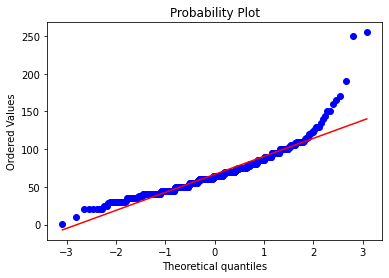

Attack


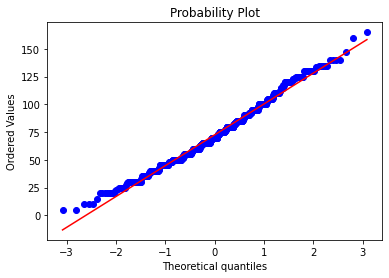

Defense


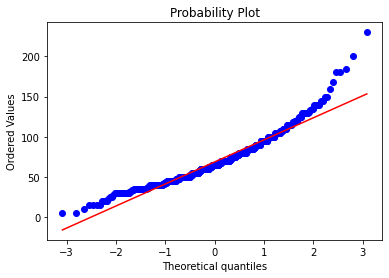

Sp. Atk


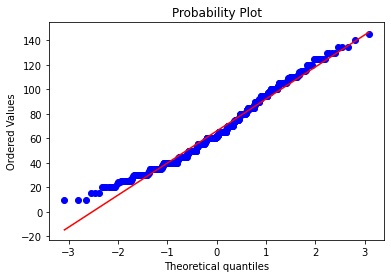

Sp. Def


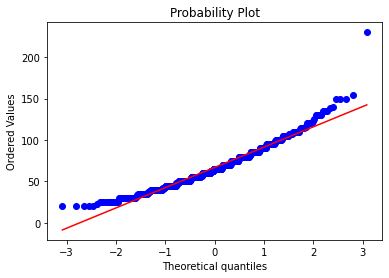

Speed


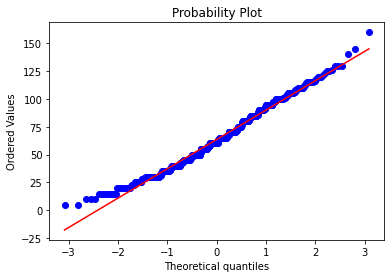

In [38]:
for atribute in atributes:
  scipy.stats.probplot(non_legendary_df[atribute], dist="norm", plot=plt)
  print(atribute)
  plt.show()

Trás echar un vistazo a los diagramas qunatile - quantile de cada atributo, los que tienen los puntos más agrupados en torno a la linea son el ataque, la vitalidad hasta el segundo quantile y la defensa especial.

## Asimetria / Kurtosis

Finalmente comprobamos los coenficientes de asimetría y Kurtosis para ver que valores toman en función del atributo estudiado:

- El coeficiente de asimetría mide la simetría de una distribución. Nos interesa que nos de un valor cercano a 0 (cuanto mas cerca de 0 más simétrica será nuestra distribución).

- El coeficiente de kurtosis mide la concentración de los datos alrededor de la media. Si su valor es 0, la concentración de datos de nuetsra distribución sería igual a la de la normal

In [28]:
for atribute in atributes:
  print(atribute)
  print(pd.Series(pokemon_df[atribute]).skew()) # Coeficiente de asimetria
  print(pd.Series(pokemon_df[atribute]).kurtosis()) # Coeficiente de Kurtosis
  print("")



HP
1.705611434963191
8.089825957693373

Attack
0.3277063927076206
-0.22500965257698358

Defense
1.1052376441802925
2.4671364832414713

Sp. Atk
0.49869511462327376
-0.2789527695537064

Sp. Def
1.0094384363083313
2.3989776827715397

Speed
0.2683283296337585
-0.4836936263057656



Vemos cómo el ataque es el atributo que mejor simetría presenta y que más agrupados tiene sus datos en torno a la media. Le siguen la velocidad y el ataque especial. Por último, realizamos un test de hipotesis para comprobar la normalidad de estos tres atributos. Donde tomaremos como hipotesis nula que el los atributos de los pokemon de los pokemon siguen una distribución normal y un pvalor critico de 0.05.

## Test de Hipotesis D'Agostino's K-squared

In [65]:
k2, p_value = scipy.stats.normaltest(non_legendary_df["Attack"])
print(f"Estadístico = {k2}, p-value = {p_value}")

k2, p_value = scipy.stats.normaltest(non_legendary_df["Speed"])
print(f"Estadístico = {k2}, p-value = {p_value}")

k2, p_value = scipy.stats.normaltest(non_legendary_df["Sp. Atk"])
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 13.127307355433782, p-value = 0.0014107219593625943
Estadístico = 16.168213125472494, p-value = 0.0003084019594376066
Estadístico = 27.51638013087484, p-value = 1.0589951560472104e-06


Viendo los pvalores obtenidos, no tenemos evidencia estadistica suficiente para afirmar la hipotesis nula. Con lo que, por los resultados del test podemos decir que los atributos estudiados no siguen una distribución nornal

# 3. Estimación puntual y por intervalos 

Estudiaremos los pokemon de tipo Normal y Agua que son los que más hay de acuerdo con el pychart del porcentaje de pokemon según el tipo.

Dataframe los pokemon no legendarios de tipo Normal

In [32]:
normal_df = non_legendary_df[non_legendary_df['Type 1'] == 'Normal']

normal_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
20,16,Pidgey,Normal,Flying,40,45,40,35,35,56,1,False,195
21,17,Pidgeotto,Normal,Flying,63,60,55,50,50,71,1,False,278
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False,378
24,19,Rattata,Normal,NaN,30,56,35,25,35,72,1,False,181
25,20,Raticate,Normal,NaN,55,81,60,50,70,97,1,False,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,628,Braviary,Normal,Flying,100,123,75,57,75,80,5,False,430
727,659,Bunnelby,Normal,NaN,38,36,38,32,36,57,6,False,180
728,660,Diggersby,Normal,Ground,85,56,77,50,77,78,6,False,345
729,661,Fletchling,Normal,Flying,45,50,43,40,38,62,6,False,216


Dataframe de los pokemon no legendarios de tipo Agua

In [29]:
water_df = non_legendary_df[non_legendary_df['Type 1'] == 'Water']

water_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,271
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,347
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,452
59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False,265
60,55,Golduck,Water,NaN,80,82,78,95,80,85,1,False,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,656,Froakie,Water,NaN,41,56,40,62,44,71,6,False,243
725,657,Frogadier,Water,NaN,54,63,52,83,56,97,6,False,308
726,658,Greninja,Water,Dark,72,95,67,103,71,122,6,False,408
762,692,Clauncher,Water,NaN,50,53,62,58,63,44,6,False,286


## Estimación puntual para la media de ataque

En este punto vamos a calcular la media de ataque de dos muestras de la población de no legendarios (tipo normal y tipo agua) y vamos a intentar inferir la media de ataque a la de toda la población. Luego calcularemos la media de toda la población de Pokemon para ver que estimación es la que mejor se ajusta a la realidad de nuestros datos

In [37]:
# Media de ataque de tipo normal 
normal_atck = normal_df['Attack'].mean()
water_atck = water_df['Attack'].mean()
pokemon_atck = non_legendary_df['Attack'].mean()

print(f"Media ataque Pokemon tipo normal: {normal_atck}")
print(f"Media ataque Pokemon tipo agua: {water_atck}")
print(f"Media ataque de todos los Pokemon: {pokemon_atck}")

print(pokemon_atck-normal_atck) # Desviaciíón de la media de ataque de tipo normal con respecto la media de la población
print(pokemon_atck-water_atck) # Desviaciíón de la media de ataque de tipo agua con respecto la media de la población

Media ataque Pokemon tipo normal: 70.15555555555555
Media ataque Pokemon tipo agua: 70.22772277227723
Media ataque de todos los Pokemon: 72.570796460177
2.4152409046214416
2.3430736878997607


A juzgar por los resultados obtenidos en la estimación puntual. Podemos ver que las medias de nuetsras muestras son bastante parecidas a la media de la población. Con lo que si no conociesemos la media de la población. Podriamos inferirla a partir de los datos de muestras de Pokemon. 

Veamos ahora, si cogiendo muestras aleatorias de Pokemon (sin tener en cuenta el tipo) conseguimos inferir la media de ataque con mayor exactitud.

In [41]:
non_legendary_df.shape[0] # Numero de filas del dataframe

678

El numero total de nuestra población de Pokemon no legendarios es de 678. Cojamos una muestra aleatoria de 100 Pokemon para tratar de inferir la media.

In [59]:
sample_df = np.random.choice(a= non_legendary_df["Attack"],
                               size=100)   

sample_df.mean()

70.55

Comprobamos que también nos acercamos a la media de la población cogiendo muestras aleatorias. Cuantos más Pokemon tengamos en cuenta en nuestras muestras más nos acercaremos al valor exacto de la media de todos los pokemon

## Estimación por intervalos para la media del ataque

En este punto trataremos de inferir la media del ataque de los pokemon no legendarios calculando los intervalos de confianza para la media de los pokemon de tipo normal y tipo agua

Calculo de los parámetros sigma para hallar el intervalo de confianza

In [60]:
normal_std = normal_df['Attack'].std(ddof=1)
water_std = water_df['Attack'].std(ddof=1)

print(normal_std)
print(water_std)

sigma_normal = normal_std/math.sqrt(normal_df.shape[0])
sigma_water = water_std/math.sqrt(water_df.shape[0])

print(sigma_normal)
print(sigma_water)

27.765839132315055
24.867199757157547
2.9267764267982956
2.474378857475257


Ahora vamos a calcular el intervalo de confianza para la media del ataque de los pokemon de tipo Normal y de tipo agua que no sean legendarios

- Calculamos el intervalo de confianza para la media de los pokemon de tipo normal

In [61]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= normal_df.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = normal_atck,                # Sample mean
                 scale = sigma_normal)             # Standard deviation estimate

<ipython-input-61-cb2bfeddc0c8>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(64.34011313767807, 75.97099797343303)

- Calculamos el intervalo de confianza para los Pokemon de tipo Agua

In [62]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= water_df.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = water_atck,                # Sample mean
                 scale = sigma_water)             # Standard deviation estimate

<ipython-input-62-6df656da7865>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(65.31862559319238, 75.13681995136209)

Viendo el intervalo de confianza obtenido y las medias calculadas podemos asegurar con una certeza del 95 % que el valor de la media de los pokemon de toda la población de no legendarios se encontrará dentro de los intervalos de confinza para la media de ataque de tipo normal y tipo agua.

A continuación se muestra la media de la población y se comprueba que entra detro de los intervalos calculados

In [47]:
non_legendary_df['Attack'].mean()

72.570796460177

# 4. T-test

En este apartado, supondremos que los datos siguen una distribución t y realizaremos un t-test para comprobar si las medias de los grupos estudiados son iguales con un nivel de significancia del 95%.

## Contraste de hipotesis univariante para pokemon de tipo normal

In [49]:
scipy.stats.ttest_1samp(a = normal_df['Attack'],               # # Sample normal type data
                 popmean = non_legendary_df['Attack'].mean())  # Pop mean

TtestResult(statistic=-0.8252222077870017, pvalue=0.4114518917594412, df=89)

Viendo el pvalor final obtenido, podemos decir que no tenemos evidencia estadistica suficiente para rechazar la hipotesis nula. Es decir, podemos asumir igualdad de ataque medio de Pokemon de tipo Normal y de toda la población

## Contraste de hipotesis univariante para pokemon de tipo agua

In [ ]:
scipy.stats.ttest_1samp(a = water_df['Attack'],               # Sample water type data
                 popmean = non_legendary_df['Attack'].mean())  # Pop mean

TtestResult(statistic=-1.0510196688722035, pvalue=0.29573325335376965, df=102)

Viendo el pvalor final obtenido, podemos decir que no tenemos evidencia estadistica suficiente para rechazar la hipotesis nula. Es decir, podemos asumir igualdad de ataque medio de Pokemon de tipo Agua y de toda la población

## Contraste de hipotesis Bivariante para comparar medias de no legendarios de tipo normal y agua

In [ ]:
scipy.stats.ttest_ind(a= normal_df['Attack'],
                b= water_df['Attack'],
                equal_var=False)    # Assume samples have equal variance?

# No tenenmos evidencia estadistica suficiente para decir que el grupo de Wisconssin es diferente del grupo de Minnesota al 95%

Ttest_indResult(statistic=0.1567616433604365, pvalue=0.8756063511036253)

Viendo el pvalor final obtenido, podemos decir que no tenemos evidencia estadistica suficiente para rechazar la hipotesis nula. Es decir, podemos asumir igualdad de ataque medio de Pokemon de tipo Agua y de tipo Normal

# 5. Test ANOVA

- Comprobación de poblaciones normalmente distribuidas en cada grupo
- Homecedasticidad de varianzas entre grupos
- Muestras aleatorias e independientes

Comprobamos que la densidad de probabilidad por grupo para ver si siguen  una distribución normal

Text(0, 0.5, 'Densidad de probabilidad')

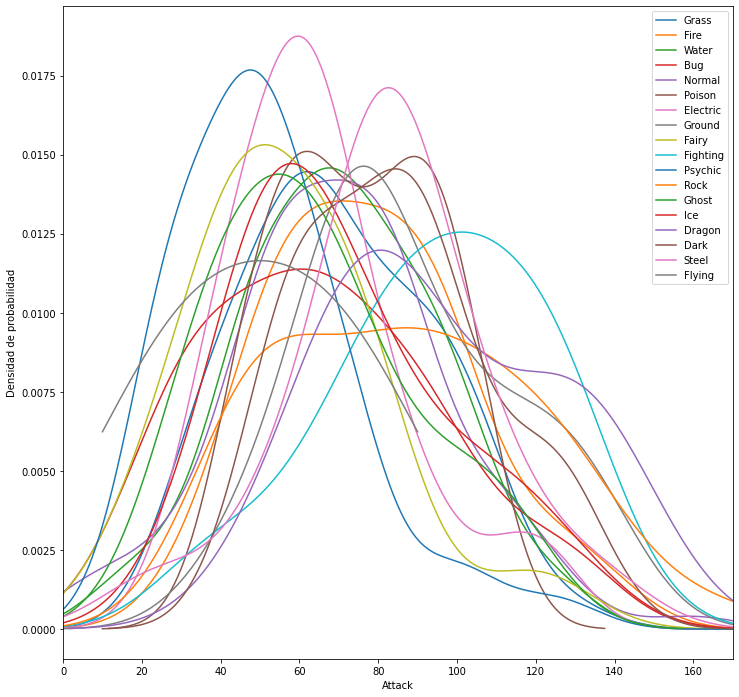

In [66]:
# Formateamos el nombre de la columna de tipo Ppra poder utilizar con  Statmodels

non_legendary_df = non_legendary_df.rename(columns={'Type 1': 'Type'})

# Extraemos los distintos tipos de Pokemon en una lista

types = non_legendary_df['Type'].unique()

# Mostramos la distribución de provbbilidad del ataque según el tipo

groups = non_legendary_df.groupby("Type").groups

for tipo in types:
  tipo = non_legendary_df['Attack'][groups[tipo]]  

  tipo.plot(kind="density",  # Plot sample mean density
                                   figsize=(12,12),
                                   xlim=(0,170));  
  
# agregar leyenda y etiquetas de eje
plt.legend(labels=types, loc='upper right')
plt.xlabel('Attack')
plt.ylabel('Densidad de probabilidad')    

A simple vista se puede comprobar como la la cantidad de puntos de ataque no sigue una distribución normal para todos los tipos de Pokemon.

Veremos esto mejor en forma de diagrama de bigotes a continuación. De esta forma también podremos comprobar si hay homcedasticidad de varianzas entre grupos.

<AxesSubplot:xlabel='Type', ylabel='Attack'>

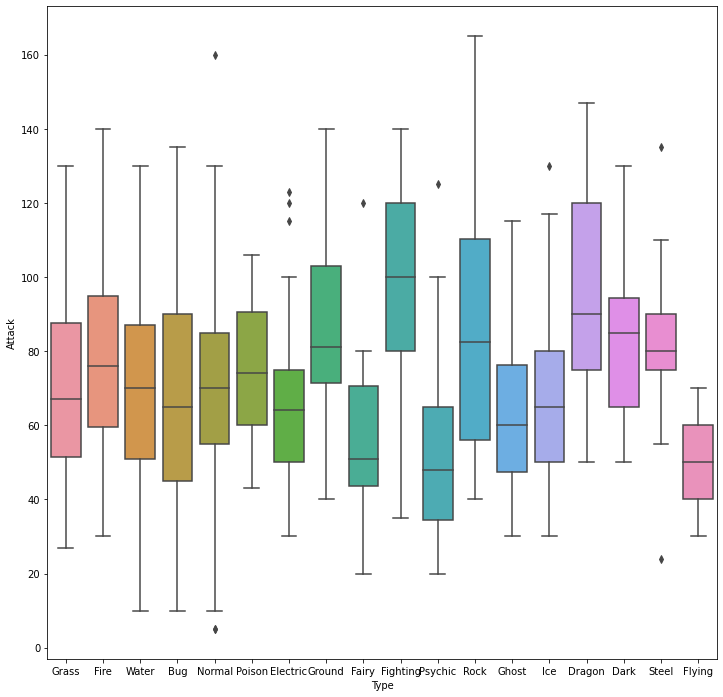

In [67]:
# Mostramos la distribución de los datos de ataque según el tipo

plt.figure(figsize=(12,12))
sns.boxplot(x="Type", y="Attack", data=non_legendary_df)

Con este diagrama comprobamos visualmente que no hay homocedasticidad de varianzas en todos los grupos. Por ejemplo, la varianza de ataque del tipo dragon es mucho mása grande que la del tipo fuego.

Vamos a corroborar esto con el Test ANOVA

ANOVA Test

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Alternate method
model = ols('HP ~ Type',                 # Model formula
            data = non_legendary_df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)


                 sum_sq     df         F    PR(>F)
Type       24363.089913   17.0  2.311136  0.002034
Residual  409262.373213  660.0       NaN       NaN


Dado el valor de p, que es menor a 0.05, no tenemos evidencia estadistica para afirmar las medias muestrales del ataque de cada tipo de pokemon, son las mismas.

A continuación nos quedaremos con los 5 tipos de pokemon que parecen tener varianzas similares (Agua, Normal, Fuego, Planta y Hielo) y volveremos a realizar el test ANOVA

Text(0, 0.5, 'Densidad de probabilidad')

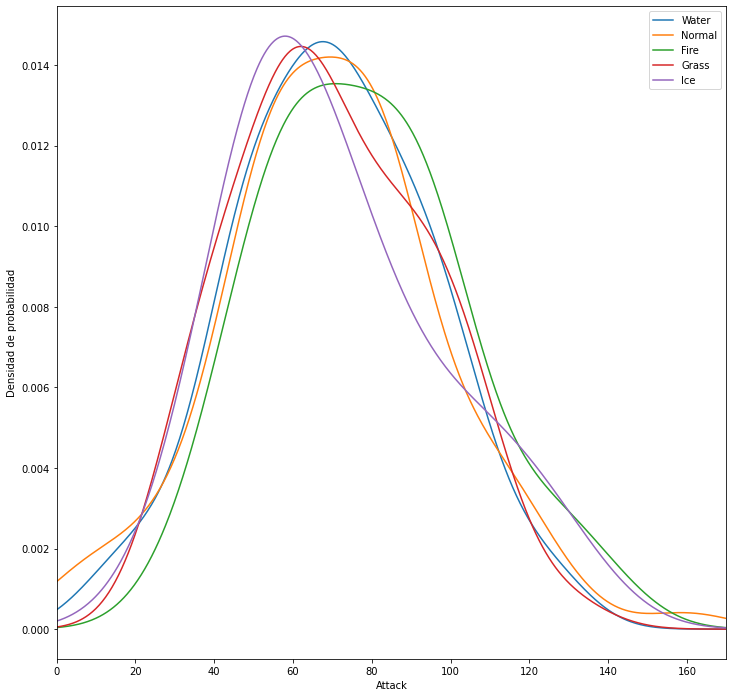

In [75]:
types = ["Water", "Normal", "Fire", "Grass", "Ice"]

for tipo in types:
  tipo = non_legendary_df['Attack'][groups[tipo]]  

  tipo.plot(kind="density",  # Plot sample mean density
                                   figsize=(12,12),
                                   xlim=(0,170));  
  
# agregar leyenda y etiquetas de eje
plt.legend(labels=types, loc='upper right')
plt.xlabel('Attack')
plt.ylabel('Densidad de probabilidad')   

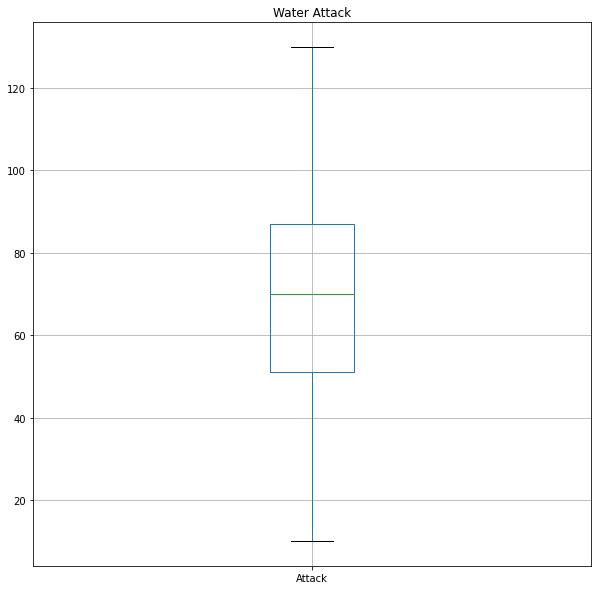

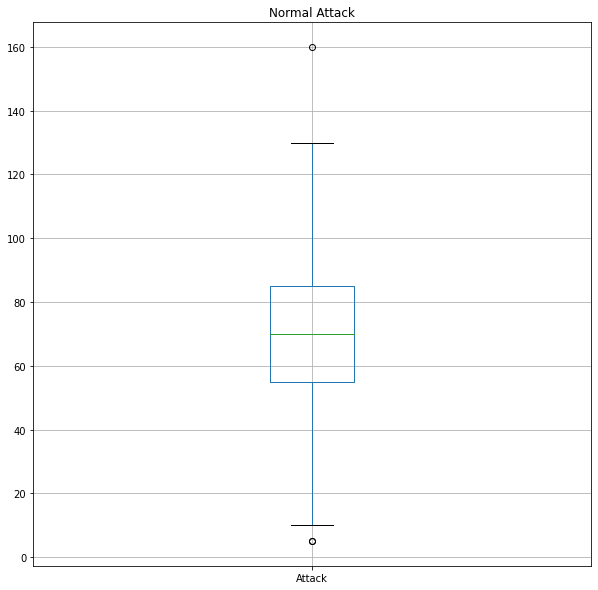

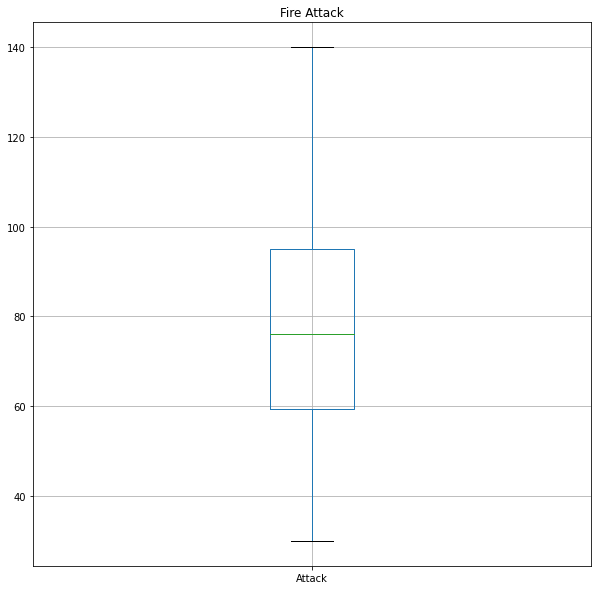

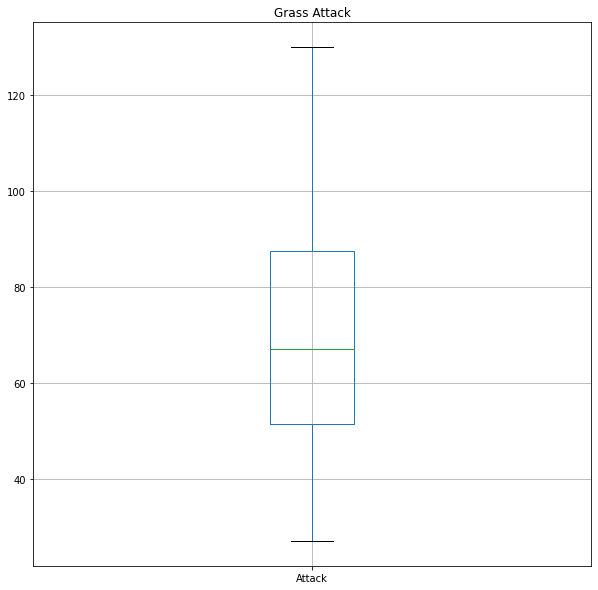

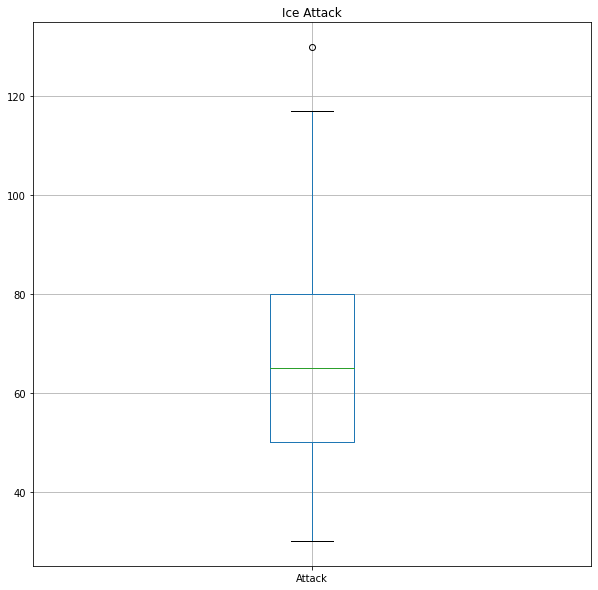

In [77]:
# Mostramos la distribución de provbbilidad del ataque según el tipo

for i in types:
  plt.figure(figsize=(10,10))
  plt.title(f"{i} Attack")
  i = non_legendary_df[non_legendary_df['Type'] == i]
  i.boxplot(column="Attack")


Hagamos el test ANOVA para los tipos seleccionados previamente

In [84]:
groups = non_legendary_df.groupby("Type").groups

water = non_legendary_df["Attack"][groups["Water"]]
fire = non_legendary_df["Attack"][groups["Fire"]]
normal = non_legendary_df["Attack"][groups["Normal"]]
grass = non_legendary_df["Attack"][groups["Grass"]]
ice = non_legendary_df["Attack"][groups["Ice"]]


scipy.stats.f_oneway(water, normal, fire, grass, ice)


F_onewayResult(statistic=0.8319228203737064, pvalue=0.505663066735387)

El resultado del test muestra evidencia estadistica suficiente para afirmar que el ataque de los pokemon de tipo Agua, Normal, Fuego, Planta y Hielo tiene la misma media. No podemos rechazar la hipotesis nula.

Para ver si alguno de los grupos difiere vamos a hacer una prueba "post-hoc", es decir, realizaremos una T-test a cada par de grupos por separado:

## Pot-hoc

In [86]:
# Get type pairs
type_pairs = []

# Iteramos sobre la lista de los tipos seleccionados para sacar todas las combinaciones y poder realizar el T-test
for type1 in range(4):
    for type2  in range(type1+1,5):
        type_pairs.append((types[type1], types[type2]))

# Hacemos el T-test para cada par de tipos
for type1, type2 in type_pairs: 
    print(type1, type2)
    print(scipy.stats.ttest_ind(non_legendary_df["Attack"][groups[type1]], 
                          non_legendary_df["Attack"][groups[type2]]))

Water Normal
Ttest_indResult(statistic=0.01895009697663808, pvalue=0.9849009053510378)
Water Fire
Ttest_indResult(statistic=-1.6809694953657137, pvalue=0.09496713282993925)
Water Grass
Ttest_indResult(statistic=0.06566697885338943, pvalue=0.947723929258364)
Water Ice
Ttest_indResult(statistic=-0.1279506331558834, pvalue=0.898402219549692)
Normal Fire
Ttest_indResult(statistic=-1.5430515184385587, pvalue=0.12523053579046267)
Normal Grass
Ttest_indResult(statistic=0.04325854831523735, pvalue=0.9655525840981278)
Normal Ice
Ttest_indResult(statistic=-0.1264435691490028, pvalue=0.8996137629831886)
Fire Grass
Ttest_indResult(statistic=1.6220427286466927, pvalue=0.10782199161877498)
Fire Ice
Ttest_indResult(statistic=1.0034875655870361, pvalue=0.31952614442181043)
Grass Ice
Ttest_indResult(statistic=-0.16506510385298317, pvalue=0.8692989902732725)


Realizando el T-test a todos los pares posibles de tipos de pokemon seleccionados comprobamos que todos ellos arrojan un p-valor mayor a 0.05, lo que nos lleva a quedarnos con la hipotesis nula en todos los test y asumir que las medias de todos los grupos son iguales. Comprobemos esto graficamente con la prueba de Turkey

group1,group2,meandiff,p-adj,lower,upper,reject
Bug,Dark,18.8923,0.1548,-2.3854,40.17,False
Bug,Dragon,31.1548,0.002,6.1758,56.1337,True
Bug,Electric,-0.3607,1.0,-19.0856,18.3641,False
Bug,Fairy,-8.3048,0.9997,-33.895,17.2854,False
Bug,Fighting,29.2277,0.0004,7.6482,50.8072,True
Bug,Fire,12.3914,0.602,-5.6333,30.4161,False
Bug,Flying,-15.4923,1.0,-81.3207,50.3361,False
Bug,Ghost,-1.6423,1.0,-25.0892,21.8046,False
Bug,Grass,4.4759,1.0,-11.7356,20.6875,False
Bug,Ground,22.5077,0.0181,1.7799,43.2355,True


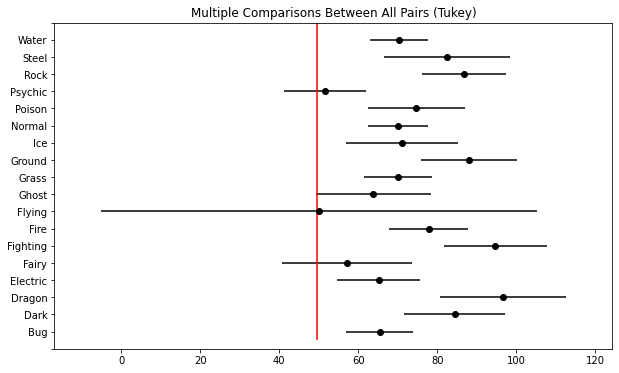

In [95]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=non_legendary_df["Attack"],     # Data
                          groups=non_legendary_df["Type"],                    # Groups
                          alpha=0.05)                           # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=18, color="red")

tukey.summary()              # See test summary